<h1>Mapping Traffic</h1>
We can now make a dedicated call to the API requesting informaton on a particular segment.
<br>
This is done via a POST-request to the API-server.
<br>


In [9]:
import requests
import json
import pandas as pd
import numpy as np

Imagine we are interested in segment with id <b>349811 </b> (This is the segment with most number of cameras).
<br>

In [10]:
segment_id = 244521
url = "https://telraam-api.net/v0/reports/" + str(segment_id)

Parameters have to be embedded in the call specifying we want the information between
December 5th, 2019 and December 8th, 2019 (08.00AM -08.00 PM)

In [11]:
param = "{\n    \"time_start\": \"2019-02-05 00:00\",\n    \"time_end\": \"2020-02-03 20:00\",\n    \"level\": \"segments\",\n    \"format\": \"per-hour\"\n}"
headers = {'Content-Type': 'application/json'}



In [12]:
r = requests.request("POST", url, headers=headers,data = param)

We get a positive reponse

In [13]:
r.status_code

200

The response can be filtered out for car and bikes

In [14]:
df = pd.DataFrame()
for i in np.arange(0,len((r.json()['report'][:]))):
    info = r.json()['report'][i]
    df_info = pd.DataFrame({'car':info['car'],'bike':info['bike']},index=[info['date']])
    df = pd.concat([df,df_info],axis=0)

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

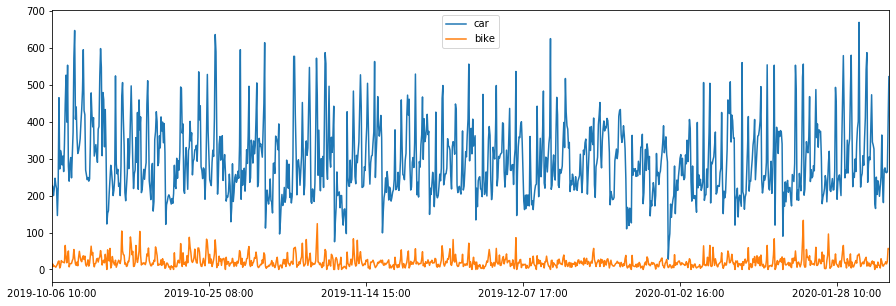

In [16]:
df.plot(figsize=(15,5));